In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from datetime import timedelta

pd.set_option('display.max_columns', None)


In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
colors = sns.color_palette('pastel')

In [3]:
df_click = pd.read_csv('C:/Users/mj985/section5/ecommerce_project/EDA/new_session_id.csv')
df_customer = pd.read_csv('C:/Users/mj985/section5/TeamProject2/csv/customer.csv')
df_product = pd.read_csv('C:/Users/mj985/section5/TeamProject2/csv/product.csv', on_bad_lines='skip')
df_trans_new = pd.read_csv('C:/Users/mj985/section5/TeamProject2/csv/transaction_new.csv')

In [4]:
df_click.head(5)

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,duration_time
0,00005746-17ec-449c-9c5c-699a3ea9304a_1,HOMEPAGE,2022-03-08 23:17:19.510057+00:00,be5923a5-1dbe-4628-bab9-83603be31dfe,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16
1,00005746-17ec-449c-9c5c-699a3ea9304a_1,CLICK,2022-03-08 23:17:22.510057+00:00,b127018a-f240-4f79-a635-5a7a1ba3245a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16
2,00005746-17ec-449c-9c5c-699a3ea9304a_1,ADD_TO_CART,2022-03-08 23:17:23.510057+00:00,f86c461a-7832-463f-bad9-6af354ee54da,MOBILE,9980.0,6.0,205309.0,NaN,NaN,NaN,NaN,0 days 00:04:16
3,00005746-17ec-449c-9c5c-699a3ea9304a_1,SCROLL,2022-03-08 23:17:25.510057+00:00,b321d2f0-13b0-4a47-ae9b-c58ed2cadd59,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16
4,00005746-17ec-449c-9c5c-699a3ea9304a_1,SEARCH,2022-03-08 23:17:32.510057+00:00,1770c2e0-0393-480d-a9e8-728ea654a51f,MOBILE,NaN,NaN,NaN,NaN,셔츠,NaN,NaN,0 days 00:04:16


In [5]:
df = df_click.rename(columns={'session_id': 'new_session_id'})

In [6]:
df['session_id'] = df['new_session_id'].apply(lambda x: x[:36])

In [7]:
df.head(5)

,new_session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,duration_time,session_id
0,00005746-17ec-449c-9c5c-699a3ea9304a_1,HOMEPAGE,2022-03-08 23:17:19.510057+00:00,be5923a5-1dbe-4628-bab9-83603be31dfe,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a
1,00005746-17ec-449c-9c5c-699a3ea9304a_1,CLICK,2022-03-08 23:17:22.510057+00:00,b127018a-f240-4f79-a635-5a7a1ba3245a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a
2,00005746-17ec-449c-9c5c-699a3ea9304a_1,ADD_TO_CART,2022-03-08 23:17:23.510057+00:00,f86c461a-7832-463f-bad9-6af354ee54da,MOBILE,9980.0,6.0,205309.0,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a
3,00005746-17ec-449c-9c5c-699a3ea9304a_1,SCROLL,2022-03-08 23:17:25.510057+00:00,b321d2f0-13b0-4a47-ae9b-c58ed2cadd59,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a
4,00005746-17ec-449c-9c5c-699a3ea9304a_1,SEARCH,2022-03-08 23:17:32.510057+00:00,1770c2e0-0393-480d-a9e8-728ea654a51f,MOBILE,NaN,NaN,NaN,NaN,셔츠,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a


In [7]:
# session_id 열을 기준으로 df와 df_trans_new를 병합
merged_df = pd.merge(df, df_trans_new, on='session_id', how='left')

In [8]:
merged_df['event_time'] = pd.to_datetime(merged_df['event_time'])

In [22]:
merged_df.head(5)

,new_session_id,event_name,event_time,event_id,traffic_source,product_id_x,quantity_x,item_price_x,payment_status_x,search_keywords,promo_code_x,promo_amount_x,duration_time,session_id,created_at,customer_id,booking_id,payment_method,payment_status_y,promo_amount_y,promo_code_y,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id_y,quantity_y,item_price_y
0,00005746-17ec-449c-9c5c-699a3ea9304a_1,HOMEPAGE,2022-03-08 23:17:19.510057+00:00,be5923a5-1dbe-4628-bab9-83603be31dfe,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a,2022-03-08T23:21:35.510057Z,25255.0,e4c70965-669d-412d-b668-af38aacc4d07,Gopay,Success,0.0,NaN,0.0,2022-03-13T17:18:32.359411Z,-6.272187,106.815766,1231854.0,9980.0,6.0,205309.0
1,00005746-17ec-449c-9c5c-699a3ea9304a_1,CLICK,2022-03-08 23:17:22.510057+00:00,b127018a-f240-4f79-a635-5a7a1ba3245a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a,2022-03-08T23:21:35.510057Z,25255.0,e4c70965-669d-412d-b668-af38aacc4d07,Gopay,Success,0.0,NaN,0.0,2022-03-13T17:18:32.359411Z,-6.272187,106.815766,1231854.0,9980.0,6.0,205309.0
2,00005746-17ec-449c-9c5c-699a3ea9304a_1,ADD_TO_CART,2022-03-08 23:17:23.510057+00:00,f86c461a-7832-463f-bad9-6af354ee54da,MOBILE,9980.0,6.0,205309.0,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a,2022-03-08T23:21:35.510057Z,25255.0,e4c70965-669d-412d-b668-af38aacc4d07,Gopay,Success,0.0,NaN,0.0,2022-03-13T17:18:32.359411Z,-6.272187,106.815766,1231854.0,9980.0,6.0,205309.0
3,00005746-17ec-449c-9c5c-699a3ea9304a_1,SCROLL,2022-03-08 23:17:25.510057+00:00,b321d2f0-13b0-4a47-ae9b-c58ed2cadd59,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a,2022-03-08T23:21:35.510057Z,25255.0,e4c70965-669d-412d-b668-af38aacc4d07,Gopay,Success,0.0,NaN,0.0,2022-03-13T17:18:32.359411Z,-6.272187,106.815766,1231854.0,9980.0,6.0,205309.0
4,00005746-17ec-449c-9c5c-699a3ea9304a_1,SEARCH,2022-03-08 23:17:32.510057+00:00,1770c2e0-0393-480d-a9e8-728ea654a51f,MOBILE,NaN,NaN,NaN,NaN,셔츠,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a,2022-03-08T23:21:35.510057Z,25255.0,e4c70965-669d-412d-b668-af38aacc4d07,Gopay,Success,0.0,NaN,0.0,2022-03-13T17:18:32.359411Z,-6.272187,106.815766,1231854.0,9980.0,6.0,205309.0


In [11]:
# 구매완료 전환율 -> 구매완료 세션 수 / 총 new_session_id 수 

num_suc = merged_df[merged_df['payment_status_x'] == 'Success']['new_session_id'].value_counts().count()
total_session = merged_df['new_session_id'].value_counts().count()

print('구매 완료 세션 수', num_suc)
print('세션 수', total_session)

print('구매완료 전환율', round(num_suc/total_session,4))

구매 완료 세션 수 508262
세션 수 5904346
구매완료 전환율 0.0861


In [12]:
last_event = merged_df.groupby('new_session_id').apply(lambda x: x.sort_values('event_time').iloc[-1])['event_name']

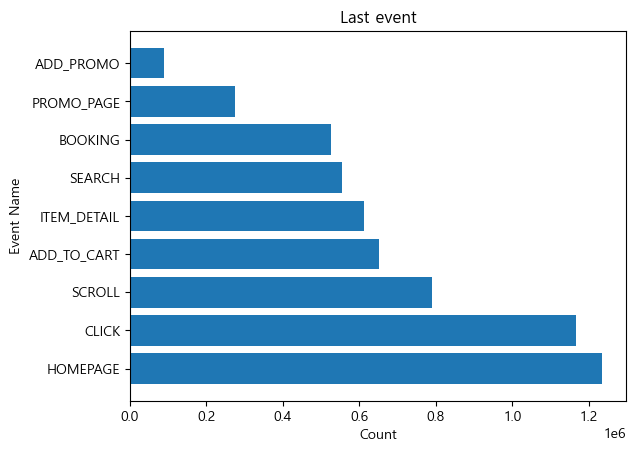

In [13]:
last_counts = last_event.value_counts()
plt.title("Last event")
plt.barh(last_counts.index, last_counts.values)
plt.ylabel('Event Name')
plt.xlabel('Count')
plt.show()

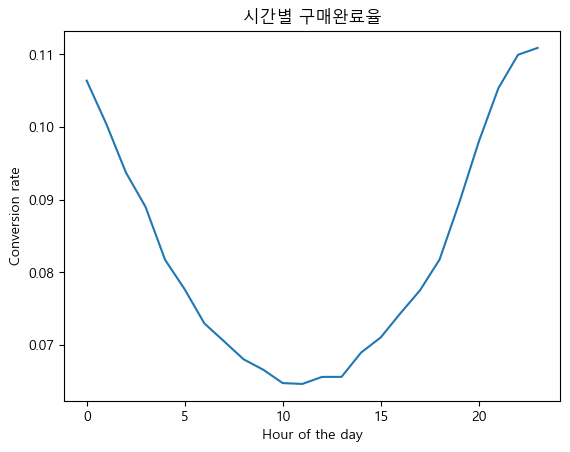

In [14]:
# merged_df에서 payment_status_x가 Success인 데이터만 추출
success_df = merged_df[merged_df['payment_status_x'] == 'Success']

# 시간대별 구매완료 세션 수 계산
num_suc_by_hour = success_df.groupby(success_df['event_time'].dt.hour)['new_session_id'].nunique()

# 시간대별 전체 세션 수 계산
total_session_by_hour = merged_df.groupby(merged_df['event_time'].dt.hour)['new_session_id'].nunique()

# 구매완료 전환율 계산
conversion_rate_by_hour = num_suc_by_hour / total_session_by_hour

# 그래프 그리기
plt.title('시간별 구매완료율')
plt.plot(conversion_rate_by_hour.index, conversion_rate_by_hour.values)
plt.xlabel('Hour of the day')
plt.ylabel('Conversion rate')
plt.show()

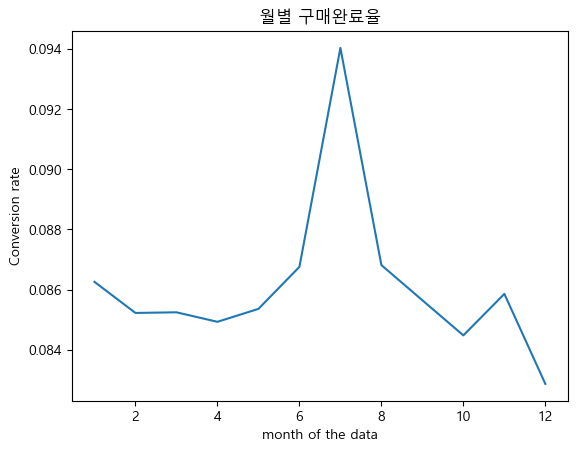

In [9]:
# merged_df에서 payment_status_x가 Success인 데이터만 추출
success_df = merged_df[merged_df['payment_status_x'] == 'Success']

# 시간대별 구매완료 세션 수 계산
num_suc_by_month = success_df.groupby(success_df['event_time'].dt.month)['new_session_id'].nunique()

# 시간대별 전체 세션 수 계산
total_session_by_month = merged_df.groupby(merged_df['event_time'].dt.month)['new_session_id'].nunique()

# 구매완료 전환율 계산
conversion_rate_by_month = num_suc_by_month / total_session_by_month

# 그래프 그리기
plt.title('월별 구매완료율')
plt.plot(conversion_rate_by_month.index, conversion_rate_by_month.values)
plt.xlabel('month of the data')
plt.ylabel('Conversion rate')
plt.show()

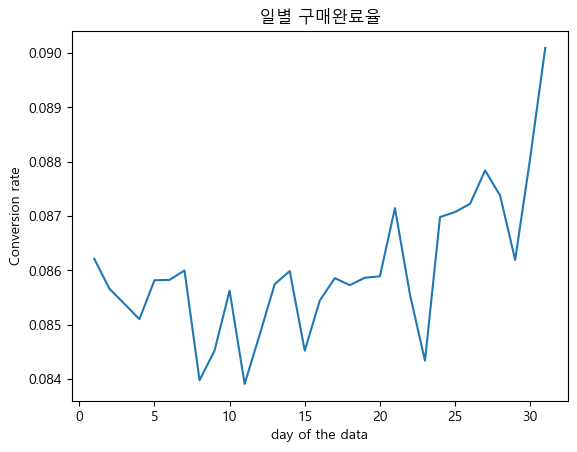

In [12]:


# 시간대별 구매완료 세션 수 계산
num_suc_by_day = success_df.groupby(success_df['event_time'].dt.day)['new_session_id'].nunique()

# 시간대별 전체 세션 수 계산
total_session_by_day = merged_df.groupby(merged_df['event_time'].dt.day)['new_session_id'].nunique()

# 구매완료 전환율 계산
conversion_rate_by_day = num_suc_by_day / total_session_by_day

# 그래프 그리기
plt.title('일별 구매완료율')
plt.plot(conversion_rate_by_day.index, conversion_rate_by_day.values)
plt.xlabel('day of the data')
plt.ylabel('Conversion rate')
plt.show()

In [15]:
drop_c_s = merged_df[(merged_df['event_name']!='SCROLL') & (merged_df['event_name']!='CLICK')]

In [16]:
drop_c_s.head(5)

,new_session_id,event_name,event_time,event_id,traffic_source,product_id_x,quantity_x,item_price_x,payment_status_x,search_keywords,promo_code_x,promo_amount_x,duration_time,session_id,created_at,customer_id,booking_id,payment_method,payment_status_y,promo_amount_y,promo_code_y,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id_y,quantity_y,item_price_y
0,00005746-17ec-449c-9c5c-699a3ea9304a_1,HOMEPAGE,2022-03-08 23:17:19.510057+00:00,be5923a5-1dbe-4628-bab9-83603be31dfe,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a,2022-03-08T23:21:35.510057Z,25255.0,e4c70965-669d-412d-b668-af38aacc4d07,Gopay,Success,0.0,NaN,0.0,2022-03-13T17:18:32.359411Z,-6.272187,106.815766,1231854.0,9980.0,6.0,205309.0
2,00005746-17ec-449c-9c5c-699a3ea9304a_1,ADD_TO_CART,2022-03-08 23:17:23.510057+00:00,f86c461a-7832-463f-bad9-6af354ee54da,MOBILE,9980.0,6.0,205309.0,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a,2022-03-08T23:21:35.510057Z,25255.0,e4c70965-669d-412d-b668-af38aacc4d07,Gopay,Success,0.0,NaN,0.0,2022-03-13T17:18:32.359411Z,-6.272187,106.815766,1231854.0,9980.0,6.0,205309.0
4,00005746-17ec-449c-9c5c-699a3ea9304a_1,SEARCH,2022-03-08 23:17:32.510057+00:00,1770c2e0-0393-480d-a9e8-728ea654a51f,MOBILE,NaN,NaN,NaN,NaN,셔츠,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a,2022-03-08T23:21:35.510057Z,25255.0,e4c70965-669d-412d-b668-af38aacc4d07,Gopay,Success,0.0,NaN,0.0,2022-03-13T17:18:32.359411Z,-6.272187,106.815766,1231854.0,9980.0,6.0,205309.0
6,00005746-17ec-449c-9c5c-699a3ea9304a_1,HOMEPAGE,2022-03-08 23:17:40.510057+00:00,ddbbaf9d-4786-4bcb-bd0d-2fca7d24947f,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a,2022-03-08T23:21:35.510057Z,25255.0,e4c70965-669d-412d-b668-af38aacc4d07,Gopay,Success,0.0,NaN,0.0,2022-03-13T17:18:32.359411Z,-6.272187,106.815766,1231854.0,9980.0,6.0,205309.0
7,00005746-17ec-449c-9c5c-699a3ea9304a_1,SEARCH,2022-03-08 23:17:45.510057+00:00,a1100f09-a98e-4563-933b-82779681abef,MOBILE,NaN,NaN,NaN,NaN,파티 드레스,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a,2022-03-08T23:21:35.510057Z,25255.0,e4c70965-669d-412d-b668-af38aacc4d07,Gopay,Success,0.0,NaN,0.0,2022-03-13T17:18:32.359411Z,-6.272187,106.815766,1231854.0,9980.0,6.0,205309.0


In [37]:
drop_last_event = drop_c_s.groupby('new_session_id').apply(lambda x: x.sort_values('event_time').iloc[-1])['event_name']

MemoryError: Unable to allocate 410. MiB for an array with shape (13, 4134065) and data type float64

In [ ]:
drop_last_counts = drop_last_event.value_counts()
plt.title("Last event")
plt.barh(drop_last_counts.index, drop_last_counts.values)
plt.ylabel('Event Name')
plt.xlabel('Count')
plt.show()

In [17]:
event_name_count = drop_c_s.groupby('new_session_id')['event_name'].count()
event_name_count.sum() / len(event_name_count)

2.231442901841166

In [18]:
event_name_count = merged_df.groupby('new_session_id')['event_name'].count()
event_name_count

new_session_id
00005746-17ec-449c-9c5c-699a3ea9304a_1          66
00007415-e0e7-4a33-95e8-5bc749016876_1          54
00008e68-a4d4-4b5d-ab7a-9fbd44f7b7fd_1           1
00008e68-a4d4-4b5d-ab7a-9fbd44f7b7fd_2           2
00008e68-a4d4-4b5d-ab7a-9fbd44f7b7fd_3           1
                                                ..
fffff7cf-2a18-4303-9c12-aa836ae3b543_5353946     1
fffff7cf-2a18-4303-9c12-aa836ae3b543_5353947     1
fffff7cf-2a18-4303-9c12-aa836ae3b543_5353948     1
fffff7cf-2a18-4303-9c12-aa836ae3b543_5353949     1
fffff7cf-2a18-4303-9c12-aa836ae3b543_5353950     1
Name: event_name, Length: 5904346, dtype: int64

In [19]:
event_name_count.sum() / len(event_name_count)

2.2301753657390675

In [23]:
check_dur = merged_df.drop_duplicates('new_session_id')